In [135]:
from wordcloud import WordCloud
import pymongo
from pymongo import MongoClient
import os

In [136]:
base_path = "C:\\Users\\Shrivatav\\Documents\\nosql_poc_vis"

In [7]:
# Connect to a running mongoDB instance
client = MongoClient()

In [10]:
db = client.urbanDictionary

In [127]:
import matplotlib.pyplot as plt

In [148]:
bad_words = ["fuck", "bitch", "ass", "penis", "vagina", "shit", "cunt", "gay", "nigger", "asshole", "anal", "anus", "blowjob",
             "whore", "slut", "pussy", "cock", "boner", "cum", "dick", "fag", "faggot", "ho", "hoe", "homo", "jizz", "nigga", "tits",
             "skank", "poop", "booty", "balls", "crap", "fart", "boobs", "butt", "black" ,"asian", "sex", "fucktard", "chode"]

In [149]:
def mongo_query_to_wordcloud(pipeline_dict):
    # Function that takes a mondodb pipeline,
    # queries the collection based on the pipeline,
    # converts the results to a python dictionary, cleans it up,
    # and creates a wordcloud from it
    
    # Get result of mongo query
    result = db.user.aggregate(pipeline_dict, allowDiskUse = True)
    result_to_list = list(result)
    
    # Convert query results to a dictionary
    count_dict = {}
    for i in result_to_list:
        count_dict[i["_id"]] = i["count"]
        
    # Create new dictionary with only clean words
    clean_dict = {key: count_dict[key] for key in count_dict if key not in bad_words}
    # Create a wordcloud object
    wordcloud = WordCloud().generate_from_frequencies(clean_dict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [141]:
# Query 8 - Most popular tags
query8 = [
    {"$unwind" : "$tags"},
    {"$sortByCount" : "$tags"}
  ]

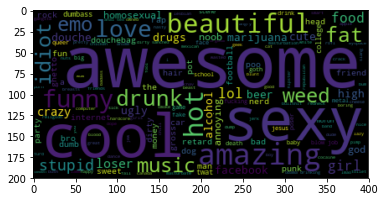

In [142]:
mongo_query_to_wordcloud(query8)

In [150]:
# query 10a - words with highest number of meanings
query10a =  [
    {"$group": {"_id" : "$lowercase_word", "count": { "$sum": 1 }}},
    {"$sort": {"count":-1}}#,
    #{"$limit": 10}
  ]


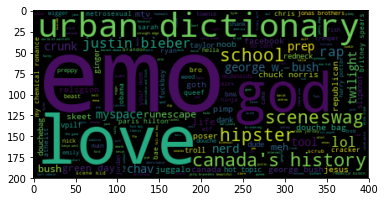

In [151]:
mongo_query_to_wordcloud(query10a)